In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 63s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

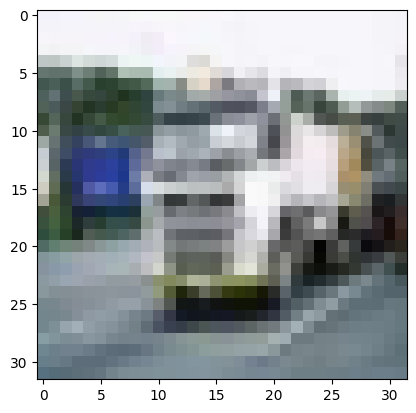

In [8]:
plt.imshow(x_train[1000])

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), 
                    input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), 
                    input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                metrics = ['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-13 15:05:32.625868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-13 15:05:32.626541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [22]:
model.fit(x_train,y_cat_train,epochs = 15, validation_data = (x_test,y_cat_test),
            callbacks = [early_stop])

Epoch 1/15


2022-11-13 15:06:58.125098: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-13 15:06:58.354167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5020 - accuracy: 0.4568

2022-11-13 15:07:18.148817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 22s 13ms/step - loss: 1.5020 - accuracy: 0.4568 - val_loss: 1.3069 - val_accuracy: 0.5304
Epoch 2/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1729 - accuracy: 0.5871 - val_loss: 1.1354 - val_accuracy: 0.6013
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0300 - accuracy: 0.6396 - val_loss: 1.0375 - val_accuracy: 0.6361
Epoch 4/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9218 - accuracy: 0.6792 - val_loss: 1.0024 - val_accuracy: 0.6589
Epoch 5/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8350 - accuracy: 0.7073 - val_loss: 0.9803 - val_accuracy: 0.6657
Epoch 6/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7592 - accuracy: 0.7361 - val_loss: 0.9734 - val_accuracy: 0.6725
Epoch 7/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6851 - accuracy: 0.7611 - val_loss: 1.0026 - val_accura

In [23]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot: >

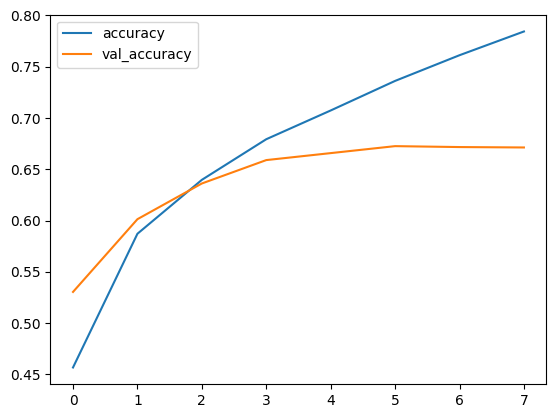

In [24]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot: >

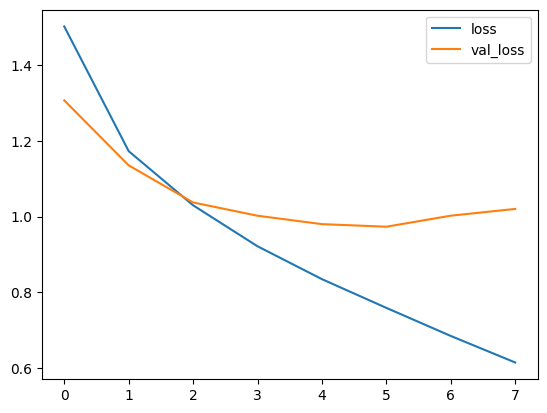

In [25]:
metrics[['loss','val_loss']].plot()

In [26]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.020386815071106, 0.6712000370025635]

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
predictions =model.predict(x_test) 
classes=np.argmax(predictions,axis=1)

 47/313 [===>..........................] - ETA: 0s

2022-11-13 19:55:18.012374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


In [29]:
print(classification_report(y_test,classes))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.78      0.81      0.79      1000
           2       0.64      0.49      0.56      1000
           3       0.43      0.56      0.49      1000
           4       0.55      0.69      0.61      1000
           5       0.58      0.56      0.57      1000
           6       0.86      0.64      0.74      1000
           7       0.74      0.72      0.73      1000
           8       0.79      0.78      0.78      1000
           9       0.71      0.79      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [30]:
confusion_matrix(y_test, classes)

array([[685,  27,  47,  30,  46,   7,   5,  22,  80,  51],
       [ 16, 808,   4,  14,   9,   6,   4,   6,  26, 107],
       [ 55,  15, 492, 130, 128,  76,  28,  38,  21,  17],
       [ 11,  21,  37, 557, 113, 154,  30,  34,  17,  26],
       [ 15,   4,  61,  90, 695,  29,  14,  65,  15,  12],
       [ 10,  13,  31, 237,  73, 557,  10,  48,   6,  15],
       [  2,  16,  47, 120,  99,  39, 640,  10,   8,  19],
       [  9,   5,  16,  61,  80,  68,   5, 716,   4,  36],
       [ 64,  39,  15,  25,  12,   8,   4,  13, 776,  44],
       [ 17,  90,  17,  22,   6,   9,   1,  19,  33, 786]])

In [32]:
import seaborn as sns

<AxesSubplot: >

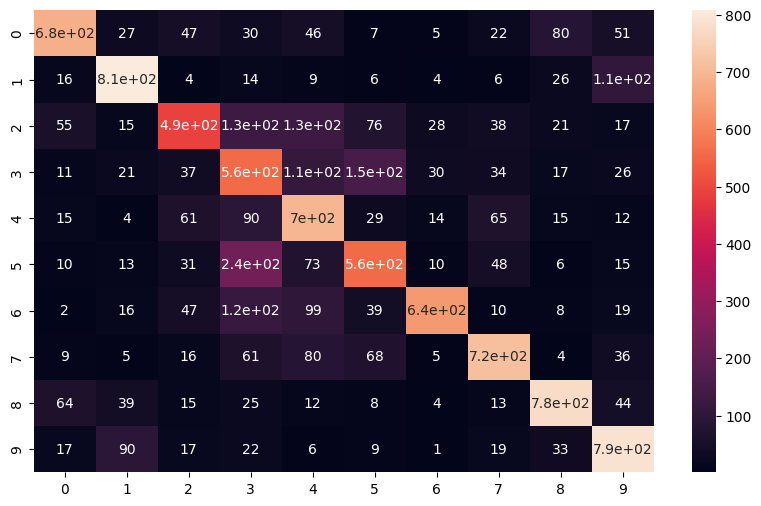

In [33]:
plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, classes),annot=True)

In [40]:
my_number = x_test[16]

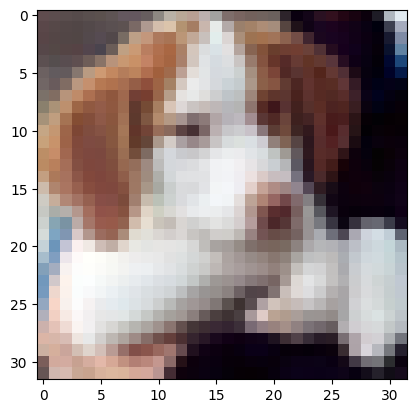

In [41]:
plt.imshow(my_number.reshape(32,32,3))

In [42]:
#num_images,width,height,color_channels
predictions = model.predict(my_number.reshape(1,32,32,3))
classes = np.argmax(predictions,axis=1)

1/1 [==============================] - 0s 13ms/step


In [43]:
classes

array([5])